In [1]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7676-6C56

 Directory of C:\Users\Owner\Documents\Python Scripts\Otest\O101

06/14/2018  12:42 PM    <DIR>          .
06/14/2018  12:42 PM    <DIR>          ..
06/13/2018  02:28 PM    <DIR>          .ipynb_checkpoints
06/13/2018  02:19 PM           378,017 Analyze vasprun.ipynb
06/14/2018  12:42 PM           577,630 Band Structure of.ipynb
06/12/2018  09:50 PM               274 KPOINTS
06/13/2018  02:18 PM               955 Mg1Mo6S8-relax.cif
06/12/2018  11:09 PM        12,590,826 vasprun.xml
               5 File(s)     13,547,702 bytes
               3 Dir(s)  172,815,753,216 bytes free


In [3]:
run = BSVasprun("vasprun.xml", parse_projected_eigen=True)

In [4]:
bs = run.get_band_structure("KPOINTS")

In [5]:
print("number of bands", bs.nb_bands)

number of bands 60


In [6]:
print("number of kpoints", len(bs.kpoints))

number of kpoints 40


In [7]:
bs.is_metal()

False

In [8]:
bs.is_spin_polarized

False

In [9]:
bs.bands

{<Spin.up: 1>: array([[-16.6617, -16.6531, -16.6296, ..., -16.7578, -16.8091, -16.8273],
        [-16.1894, -16.2023, -16.2377, ..., -16.1823, -16.1336, -16.1161],
        [ -3.8716,  -3.8698,  -3.8427, ...,  -3.9516,  -3.9671,  -3.9728],
        ..., 
        [ 26.7576,  26.8616,  27.2793, ...,  31.0258,  31.3683,  31.5077],
        [ 30.2459,  30.6531,  29.6876, ...,  31.7109,  31.6515,  31.6159],
        [ 33.3608,  32.0044,  29.6876, ...,  31.8467,  31.8518,  31.7903]])}

In [10]:
bs.bands[Spin.up].shape

(60, 40)

In [11]:
bs.bands[Spin.up][9,:]

array([ -1.57300000e-01,  -1.32800000e-01,  -6.31000000e-02,
         3.64000000e-02,   1.23200000e-01,   1.45800000e-01,
         1.14400000e-01,   6.17000000e-02,   1.00000000e-04,
        -3.54000000e-02,  -3.54000000e-02,  -1.90000000e-02,
         1.58000000e-02,   6.12000000e-02,   1.15100000e-01,
         1.72900000e-01,   2.26900000e-01,   1.94800000e-01,
         1.36000000e-01,   1.13300000e-01,   1.13300000e-01,
         1.11300000e-01,   1.05600000e-01,   9.69000000e-02,
         8.60000000e-02,   7.40000000e-02,   6.20000000e-02,
         5.10000000e-02,   4.18000000e-02,   3.52000000e-02,
         3.52000000e-02,   3.64000000e-02,   1.38000000e-02,
        -1.37000000e-02,   7.04000000e-02,   1.55500000e-01,
         1.12700000e-01,   4.61000000e-02,  -8.40000000e-03,
        -3.54000000e-02])

In [12]:
n = 0
for kpoints, e in zip(bs.kpoints, bs.bands[Spin.up][9,:]):
    n += 1
    if n == 11:
        print("...")
    if 10 < n < 190:
        continue
        
    print("kx = %5.3f  ky = %5.3f  kz = %5.3f  eps(k) = %8.4f" % (tuple(kpoints.frac_coords)+ (e,)))

kx = 0.500  ky = 0.500  kz = 0.500  eps(k) =  -0.1573
kx = 0.444  ky = 0.444  kz = 0.444  eps(k) =  -0.1328
kx = 0.389  ky = 0.389  kz = 0.389  eps(k) =  -0.0631
kx = 0.333  ky = 0.333  kz = 0.333  eps(k) =   0.0364
kx = 0.278  ky = 0.278  kz = 0.278  eps(k) =   0.1232
kx = 0.222  ky = 0.222  kz = 0.222  eps(k) =   0.1458
kx = 0.167  ky = 0.167  kz = 0.167  eps(k) =   0.1144
kx = 0.111  ky = 0.111  kz = 0.111  eps(k) =   0.0617
kx = 0.056  ky = 0.056  kz = 0.056  eps(k) =   0.0001
kx = 0.000  ky = 0.000  kz = 0.000  eps(k) =  -0.0354
...


In [13]:
bsplot = BSPlotter(bs)

3.27247871


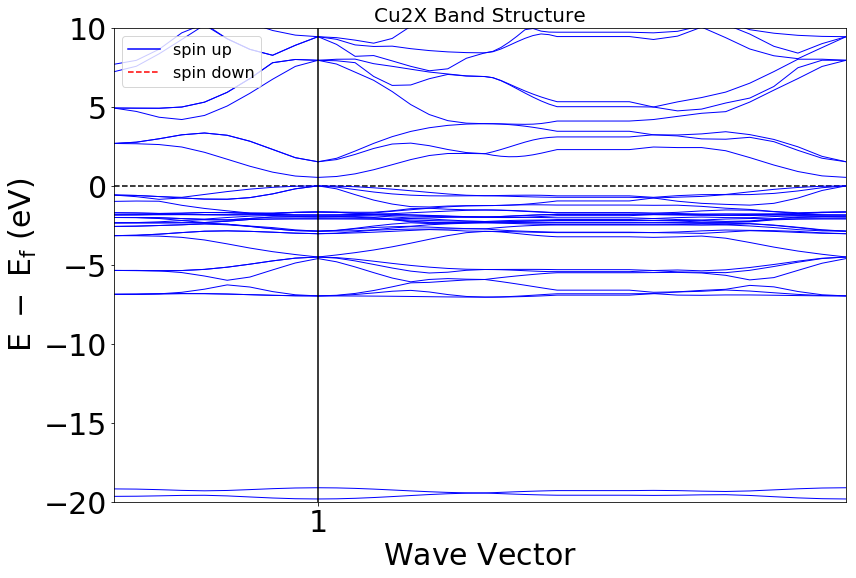

In [14]:
# get the plot
bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
print(bs.efermi)

# add some features
ax = plt.gca()
ax.set_title("Cu2X Band Structure", fontsize=20)
xlim = ax.get_xlim()
ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

# add legend
ax.plot((), (), "b-", label="spin up")
ax.plot((), (), "r--", label="spin down")
ax.legend(fontsize=16, loc="upper left")

In [15]:
data = bsplot.bs_plot_data()

In [16]:
data.keys()

dict_keys(['ticks', 'distances', 'energy', 'vbm', 'cbm', 'lattice', 'zero_energy', 'is_metal', 'band_gap'])

In [17]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    print(20 * "-")
    for x, bands in zip(xpath, epath[spin][ibands]):
        print("%8.4f %8.4f" % (x, bands))

--------------------
  0.0000  -3.1512
  0.1408  -3.1267
  0.2816  -3.0570
  0.4225  -2.9575
  0.5633  -2.8707
  0.7041  -2.8481
  0.8449  -2.8795
  0.9857  -2.9322
  1.1266  -2.9938
  1.2674  -3.0293
--------------------
  1.2674  -3.0293
  1.3824  -3.0129
  1.4974  -2.9781
  1.6123  -2.9327
  1.7273  -2.8788
  1.8423  -2.8210
  1.9573  -2.7670
  2.0723  -2.7991
  2.1872  -2.8579
  2.3022  -2.8806
  2.3022  -2.8806
  2.3520  -2.8826
  2.4018  -2.8883
  2.4516  -2.8970
  2.5014  -2.9079
  2.5512  -2.9199
  2.6009  -2.9319
  2.6507  -2.9429
  2.7005  -2.9521
  2.7503  -2.9587
  3.1984  -2.9587
  3.3478  -2.9575
  3.4971  -2.9801
  3.6465  -3.0076
  3.7958  -2.9235
  3.9452  -2.8384
  4.0946  -2.8812
  4.2439  -2.9478
  4.3933  -3.0023
  4.5427  -3.0293


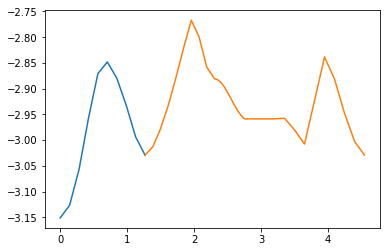

In [18]:
ibands = 9 # band number from 0 --> number of bands
spin = str(Spin.up)

for xpath, epath in zip(data["distances"], data["energy"]):
    plt.plot(xpath, epath[spin][ibands])

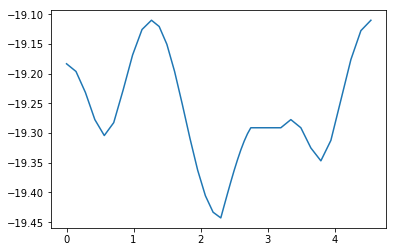

In [19]:
ibands = 1  # band number from 0 --> number of bands
spin = str(Spin.up)

x = list()
y = list()
for xpath, epath in zip(data["distances"], data["energy"]):
    x += xpath
    y += epath[spin][ibands]

plt.plot(x, y)

In [20]:
dosrun = Vasprun("vasprun.xml", parse_dos=True)
dos = dosrun.complete_dos
print(dosrun.efermi)
print(dos.efermi)

3.27247871
3.27247871


C:\Users\Owner\Anaconda3\lib\site-packages\pymatgen\io\vasp\outputs.py:877: UserWarning: No POTCAR file with matching TITEL fields was found in C:\Users\Owner\Documents\Python Scripts\Otest\O101
  " was found in {}".format(os.path.abspath(p)))


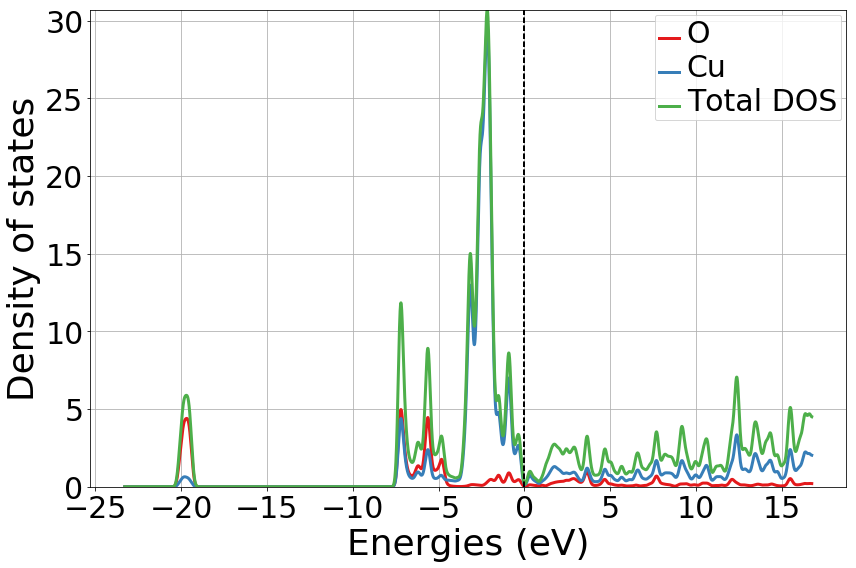

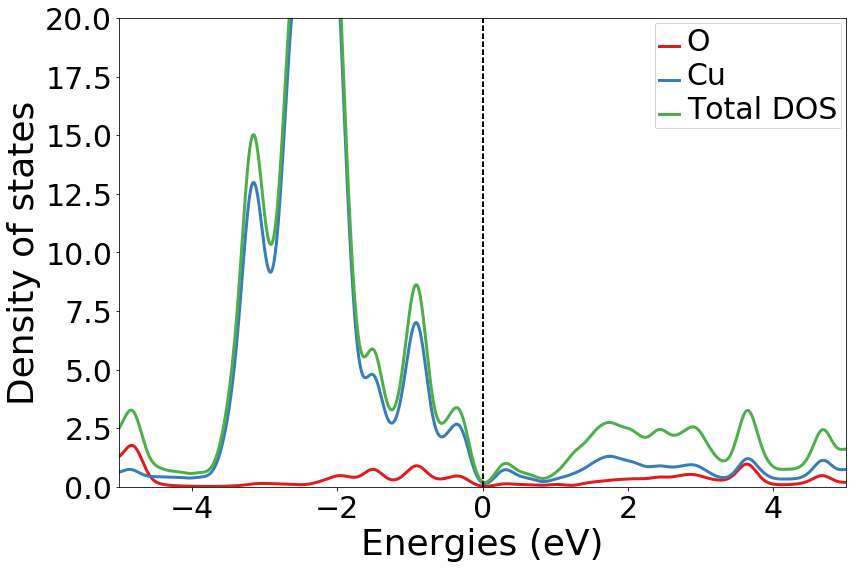

In [21]:
dosplot = DosPlotter(sigma=0.1)
dosplot.add_dos("Total DOS", dos)
dosplot.add_dos_dict(dos.get_element_dos())
plot = dosplot.get_plot()
plt.grid()
dosplot.show(xlim=[-5, 5], ylim=[0, 20])

In [22]:
bs = run.get_band_structure("KPOINTS", efermi=dos.efermi)

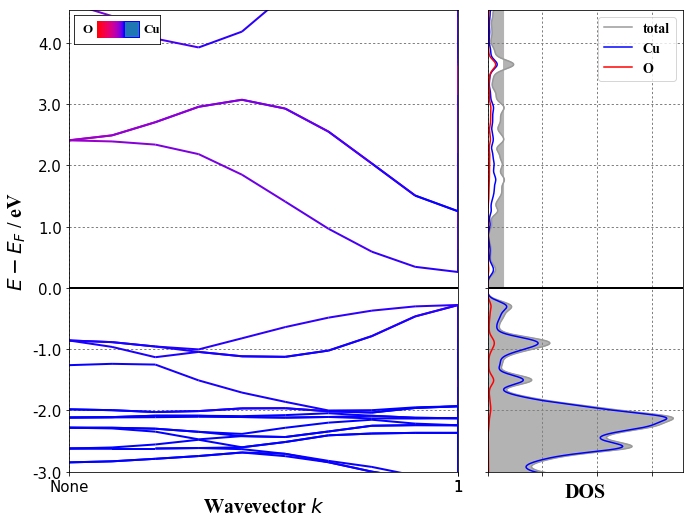

In [23]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=3,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)

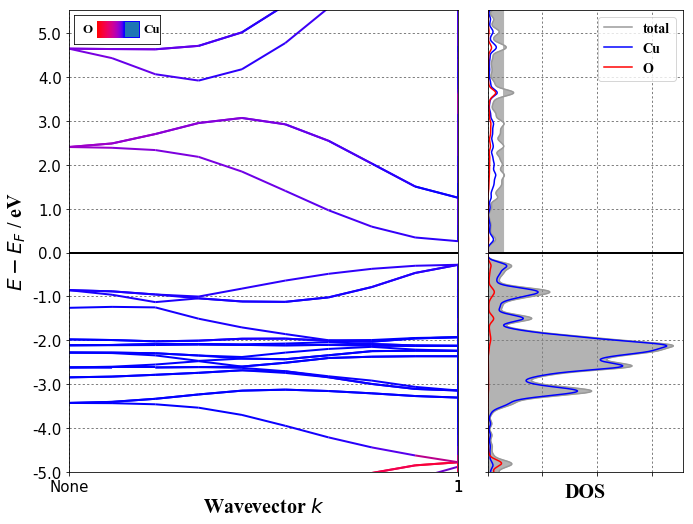

In [24]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements",
    dos_projection="elements",
    vb_energy_range=5,
    cb_energy_range=5,
    egrid_interval=1
)
plt = bsdosplot.get_plot(bs, dos=dos)